<a href="https://colab.research.google.com/github/mistryvivek/A-Level-NEA/blob/main/Lit_Review_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
%pip install fastf1
import numpy
import pandas as pd
import matplotlib
import fastf1
import seaborn as sns

In [153]:
british_2024_fp1 = fastf1.get_session(2024, 'British', 'FP1')
british_2024_fp2 = fastf1.get_session(2024, 'British', 'FP2')
british_2024_fp3 = fastf1.get_session(2024, 'British', 'FP3')
british_2024_race = fastf1.get_session(2024, 'British', 'Race')

british_2024_fp_sessions = [british_2024_fp1, british_2024_fp2, british_2024_fp3]

In [154]:
for session in british_2024_fp_sessions:
  session.load(laps=True)

core           INFO 	Loading data for British Grand Prix - Practice 1 [v3.4.1]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Practice 1 [v3.4.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core        

In [145]:
# Data cleaning
british_2024_fp1_ham_ver = british_2024_fp1.laps.pick_drivers(['VER', 'HAM'])
british_2024_fp1_ham_ver = british_2024_fp1_ham_ver.dropna(subset=['LapTime'])

In [142]:
british_2024_fp1_ham_ver["LapTimeConverted"] = british_2024_fp1_ham_ver["LapTime"].dt.total_seconds()

In [143]:
british_2024_fp1_ham_ver

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeConverted
1,0 days 00:18:00.531000,VER,1,0 days 00:01:29.906000,2.0,1.0,NaT,NaT,0 days 00:00:28.837000,0 days 00:00:36.496000,...,Red Bull Racing,0 days 00:16:30.625000,2024-07-05 11:33:07.236,12,NaN,False,,False,True,89.906
2,0 days 00:20:22.271000,VER,1,0 days 00:02:21.740000,3.0,1.0,NaT,NaT,0 days 00:00:46.460000,0 days 00:00:51.104000,...,Red Bull Racing,0 days 00:18:00.531000,2024-07-05 11:34:37.142,1,NaN,False,,False,True,141.740
3,0 days 00:21:51.320000,VER,1,0 days 00:01:29.049000,4.0,1.0,NaT,NaT,0 days 00:00:28.681000,0 days 00:00:36.145000,...,Red Bull Racing,0 days 00:20:22.271000,2024-07-05 11:36:58.882,12,NaN,False,,False,True,89.049
6,0 days 00:32:43.207000,VER,1,0 days 00:01:28.370000,7.0,2.0,NaT,NaT,0 days 00:00:28.364000,0 days 00:00:35.864000,...,Red Bull Racing,0 days 00:31:14.837000,2024-07-05 11:47:51.448,1,NaN,False,,False,True,88.370
7,0 days 00:34:22.841000,VER,1,0 days 00:01:39.634000,8.0,2.0,NaT,0 days 00:34:16.799000,0 days 00:00:32.501000,0 days 00:00:39.869000,...,Red Bull Racing,0 days 00:32:43.207000,2024-07-05 11:49:19.818,1,NaN,False,,False,False,99.634
9,0 days 00:47:34.744000,VER,1,0 days 00:01:27.764000,10.0,3.0,NaT,NaT,0 days 00:00:28.262000,0 days 00:00:35.582000,...,Red Bull Racing,0 days 00:46:06.980000,2024-07-05 12:02:43.591,1,NaN,False,,False,True,87.764
10,0 days 00:49:52.176000,VER,1,0 days 00:02:17.432000,11.0,3.0,NaT,NaT,0 days 00:00:41.858000,0 days 00:01:03.825000,...,Red Bull Racing,0 days 00:47:34.744000,2024-07-05 12:04:11.355,1,NaN,False,,False,True,137.432
11,0 days 00:51:19.905000,VER,1,0 days 00:01:27.729000,12.0,3.0,NaT,NaT,0 days 00:00:28.320000,0 days 00:00:35.433000,...,Red Bull Racing,0 days 00:49:52.176000,2024-07-05 12:06:28.787,1,NaN,False,,False,True,87.729
12,0 days 00:53:02.130000,VER,1,0 days 00:01:42.225000,13.0,3.0,NaT,0 days 00:52:56.222000,0 days 00:00:35.331000,0 days 00:00:40.111000,...,Red Bull Racing,0 days 00:51:19.905000,2024-07-05 12:07:56.516,1,NaN,False,,False,False,102.225
14,0 days 01:02:12.107000,VER,1,0 days 00:01:32.417000,15.0,4.0,NaT,NaT,0 days 00:00:29.392000,0 days 00:00:37.666000,...,Red Bull Racing,0 days 01:00:39.690000,2024-07-05 12:17:16.301,1,NaN,False,,False,True,92.417


In [155]:
# Set the seaborn style
sns.set(style="whitegrid")

# Iterate through each driver
for driver in british_2024_fp1_ham_ver['Driver'].unique():
    driver_data = british_2024_fp1_ham_ver[british_2024_fp1_ham_ver['Driver'] == driver]  # Filter data for each driver

    # Create a new figure for each driver
    plt.figure(figsize=(12, 6))

    # Plot lap times, using different colors for each compound
    sns.lineplot(
        data=driver_data,
        x='LapNumber',  # Assuming lap times are in sequential order
        y='LapTimeConverted',
        hue='Stint',
        marker='o',
        palette='tab10'
    )

    """
    # Add vertical lines to indicate stint changes
    stint_changes = driver_data['Stint'].diff().ne(0).index[british_2024_fp_sessions_df['Stint'].diff().ne(0)]
    for stint_change in stint_changes:
        plt.axvline(x=stint_change, color='grey', linestyle='--', linewidth=1)

    """

    # Titles and labels
    plt.title(f'Lap Times for {driver}')
    plt.xlabel('Lap')
    plt.ylabel('Lap Time (seconds)')
    plt.legend(title='Stint')

    # Show plot
    plt.show()

ValueError: Could not interpret value `LapTimeConverted` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [156]:
# Data cleaning
british_2024_fp2_ham_ver = british_2024_fp2.laps.pick_drivers(['VER', 'HAM'])
british_2024_fp2_ham_ver = british_2024_fp2_ham_ver.dropna(subset=['LapTime'])

british_2024_fp2_ham_ver["LapTimeConverted"] = british_2024_fp2_ham_ver["LapTime"].dt.total_seconds()

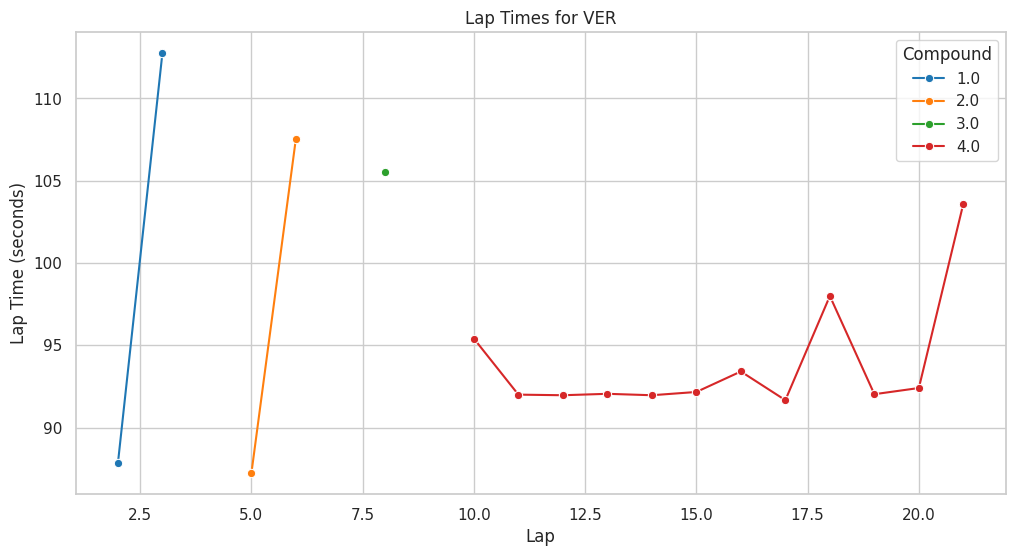

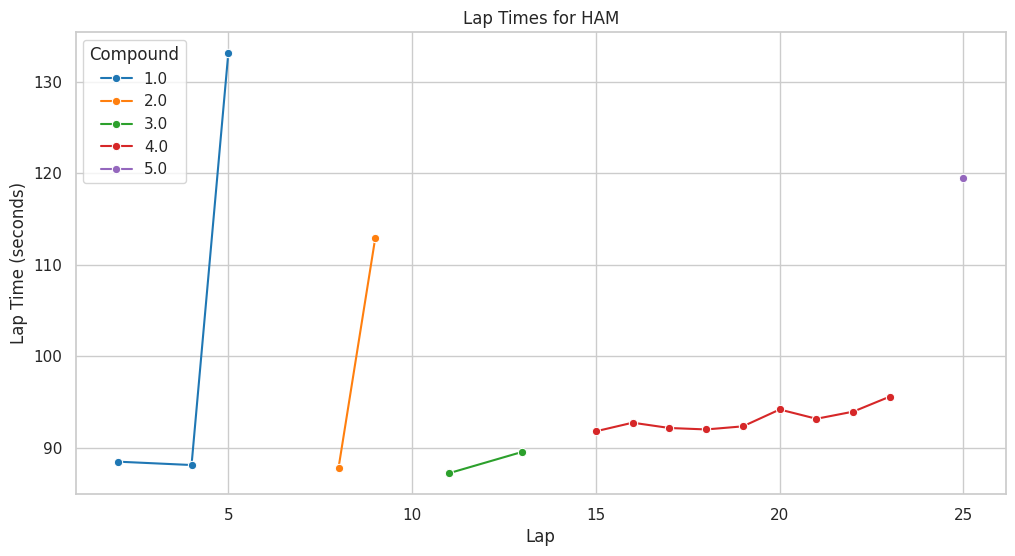

In [157]:
# Set the seaborn style
sns.set(style="whitegrid")

# Iterate through each driver
for driver in british_2024_fp2_ham_ver['Driver'].unique():
    driver_data = british_2024_fp2_ham_ver[british_2024_fp2_ham_ver['Driver'] == driver]  # Filter data for each driver

    # Create a new figure for each driver
    plt.figure(figsize=(12, 6))

    # Plot lap times, using different colors for each compound
    sns.lineplot(
        data=driver_data,
        x='LapNumber',  # Assuming lap times are in sequential order
        y='LapTimeConverted',
        hue='Stint',
        marker='o',
        palette='tab10'
    )

    """
    # Add vertical lines to indicate stint changes
    stint_changes = driver_data['Stint'].diff().ne(0).index[british_2024_fp_sessions_df['Stint'].diff().ne(0)]
    for stint_change in stint_changes:
        plt.axvline(x=stint_change, color='grey', linestyle='--', linewidth=1)

    """

    # Titles and labels
    plt.title(f'Lap Times for {driver}')
    plt.xlabel('Lap')
    plt.ylabel('Lap Time (seconds)')
    plt.legend(title='Compound')

    # Show plot
    plt.show()

In [158]:
# Data cleaning
british_2024_fp3_ham_ver = british_2024_fp3.laps.pick_drivers(['VER', 'HAM'])
british_2024_fp3_ham_ver = british_2024_fp3_ham_ver.dropna(subset=['LapTime'])

british_2024_fp3_ham_ver["LapTimeConverted"] = british_2024_fp3_ham_ver["LapTime"].dt.total_seconds()

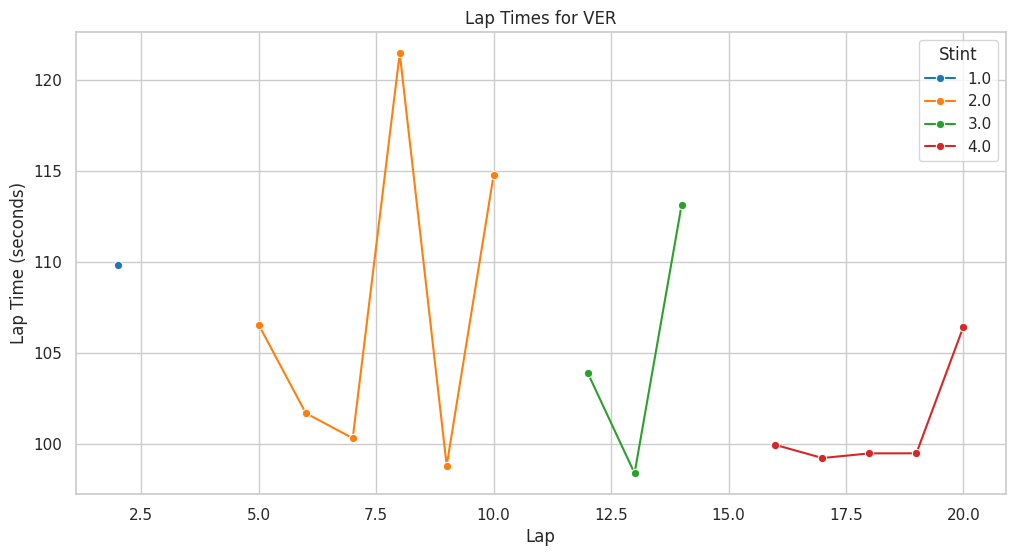

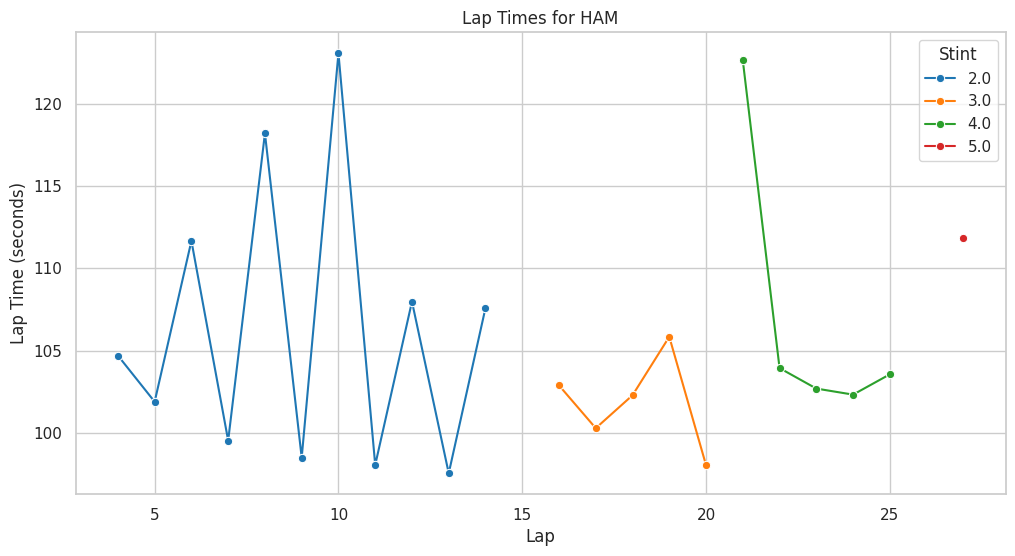

In [159]:
# Set the seaborn style
sns.set(style="whitegrid")

# Iterate through each driver
for driver in british_2024_fp3_ham_ver['Driver'].unique():
    driver_data = british_2024_fp3_ham_ver[british_2024_fp3_ham_ver['Driver'] == driver]  # Filter data for each driver

    # Create a new figure for each driver
    plt.figure(figsize=(12, 6))

    # Plot lap times, using different colors for each compound
    sns.lineplot(
        data=driver_data,
        x='LapNumber',  # Assuming lap times are in sequential order
        y='LapTimeConverted',
        hue='Stint',
        marker='o',
        palette='tab10'
    )

    """
    # Add vertical lines to indicate stint changes
    stint_changes = driver_data['Stint'].diff().ne(0).index[british_2024_fp_sessions_df['Stint'].diff().ne(0)]
    for stint_change in stint_changes:
        plt.axvline(x=stint_change, color='grey', linestyle='--', linewidth=1)

    """

    # Titles and labels
    plt.title(f'Lap Times for {driver}')
    plt.xlabel('Lap')
    plt.ylabel('Lap Time (seconds)')
    plt.legend(title='Stint')

    # Show plot
    plt.show()

We can see the short runs - cool down and then set fastest, getting used to the track and race runs. Be interesting to see what tire with each one here.

Objectives - see stints from this.

In [161]:
british_2024_race.load()
british_2024_race_ham_ver = british_2024_race.laps.pick_drivers(['VER', 'HAM'])

core           INFO 	Loading data for British Grand Prix - Race [v3.4.1]
INFO:fastf1.fastf1.core:Loading data for British Grand Prix - Race [v3.4.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

In [165]:
british_2024_race_ham_ver['CumlTime'] = british_2024_race_ham_ver['LapTime'].cumsum()
british_2024_race_ham_ver

<ipython-input-165-67f652d003be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_2024_race_ham_ver['CumlTime'] = british_2024_race_ham_ver['LapTime'].cumsum()


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,CumlTime
0,0 days 00:59:51.833000,HAM,44,0 days 00:01:36.034000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:37.703000,...,Mercedes,0 days 00:58:15.512000,2024-07-07 14:03:12.541,1,3.0,False,,False,False,0 days 00:01:36.034000
1,0 days 01:01:23.253000,HAM,44,0 days 00:01:31.420000,2.0,1.0,NaT,NaT,0 days 00:00:29.249000,0 days 00:00:37.314000,...,Mercedes,0 days 00:59:51.833000,2024-07-07 14:04:48.862,1,2.0,False,,False,True,0 days 00:03:07.454000
2,0 days 01:02:54.969000,HAM,44,0 days 00:01:31.716000,3.0,1.0,NaT,NaT,0 days 00:00:29.287000,0 days 00:00:37.133000,...,Mercedes,0 days 01:01:23.253000,2024-07-07 14:06:20.282,1,2.0,False,,False,True,0 days 00:04:39.170000
3,0 days 01:04:26.957000,HAM,44,0 days 00:01:31.988000,4.0,1.0,NaT,NaT,0 days 00:00:29.554000,0 days 00:00:37.258000,...,Mercedes,0 days 01:02:54.969000,2024-07-07 14:07:51.998,1,2.0,False,,False,True,0 days 00:06:11.158000
4,0 days 01:05:58.634000,HAM,44,0 days 00:01:31.677000,5.0,1.0,NaT,NaT,0 days 00:00:29.469000,0 days 00:00:37.231000,...,Mercedes,0 days 01:04:26.957000,2024-07-07 14:09:23.986,1,2.0,False,,False,True,0 days 00:07:42.835000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0 days 02:14:46.945000,VER,1,0 days 00:01:28.952000,48.0,3.0,NaT,NaT,0 days 00:00:28.807000,0 days 00:00:36.166000,...,Red Bull Racing,0 days 02:13:17.993000,2024-07-07 15:18:15.022,1,2.0,False,,False,True,0 days 02:38:58.205000
100,0 days 02:16:16.505000,VER,1,0 days 00:01:29.560000,49.0,3.0,NaT,NaT,0 days 00:00:29.166000,0 days 00:00:35.949000,...,Red Bull Racing,0 days 02:14:46.945000,2024-07-07 15:19:43.974,1,2.0,False,,False,True,0 days 02:40:27.765000
101,0 days 02:17:45.791000,VER,1,0 days 00:01:29.286000,50.0,3.0,NaT,NaT,0 days 00:00:29.084000,0 days 00:00:35.787000,...,Red Bull Racing,0 days 02:16:16.505000,2024-07-07 15:21:13.534,1,2.0,False,,False,True,0 days 02:41:57.051000
102,0 days 02:19:15.234000,VER,1,0 days 00:01:29.443000,51.0,3.0,NaT,NaT,0 days 00:00:29.097000,0 days 00:00:35.888000,...,Red Bull Racing,0 days 02:17:45.791000,2024-07-07 15:22:42.820,1,2.0,False,,False,True,0 days 02:43:26.494000


In [172]:
british_2024_race_ham_ver['CumlTime'] = british_2024_race_ham_ver['CumlTime'].dt.total_seconds()

AttributeError: Can only use .dt accessor with datetimelike values

In [173]:
british_2024_race_ham_ver['ConvSeconds'] = british_2024_race_ham_ver['LapTime'].dt.total_seconds()

<ipython-input-173-f45ca94e3bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_2024_race_ham_ver['ConvSeconds'] = british_2024_race_ham_ver['LapTime'].dt.total_seconds()


In [181]:
british_2024_race_ham_ver['PositionChange'] = british_2024_race_ham_ver['Position'].diff().ne(0)

<ipython-input-181-e61683e4933f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  british_2024_race_ham_ver['PositionChange'] = british_2024_race_ham_ver['Position'].diff().ne(0)


NameError: name 'position' is not defined

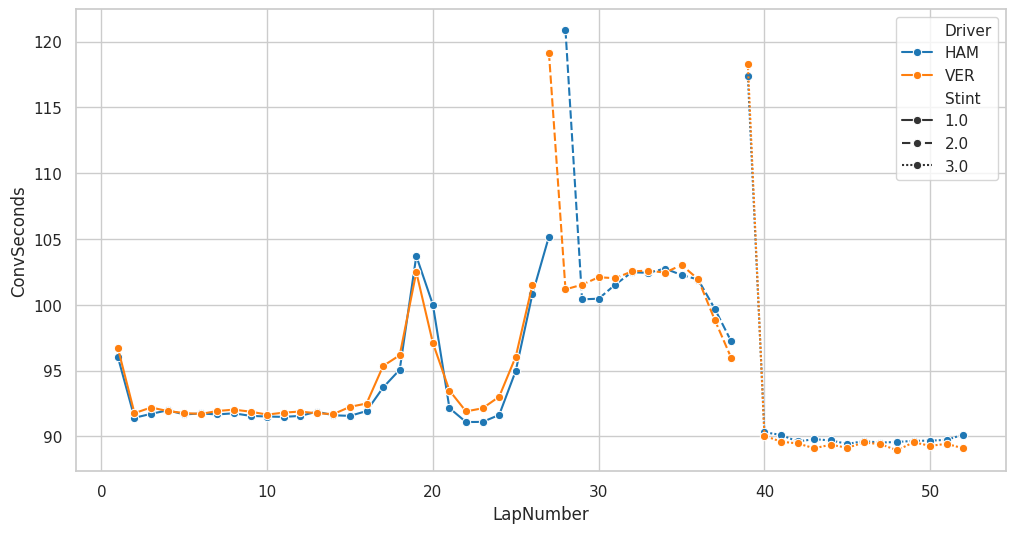

In [182]:
# Create a new figure for each driver
plt.figure(figsize=(12, 6))

# Plot lap times, using different colors for each compound
sns.lineplot(
    data=british_2024_race_ham_ver,
    x='LapNumber',  # Assuming lap times are in sequential order
    y='ConvSeconds',
    hue='Driver',
    style='Stint',
    marker='o',
    palette='tab10'
)

plt.annotate(
    f'Position Change to {position}',  # Display the new position
    xy=(lap, lap_time),                # Place arrow at the lap and lap time
    xytext=(lap, lap_time + 1),        # Offset text slightly above
    arrowprops=dict(arrowstyle="->", color="red"),
    ha='center', va='bottom', color='red'
)

* Did anything happen at lap 18 to 28.
*